### Data Set Information:

The information gathered is from the DAEWOO Steel Co. Ltd in Gwangyang, South Korea. It produces several types of coils, steel plates, and iron plates. The information on electricity consumption is held in a cloud-based system. The information on energy consumption of the industry is stored on the website of the Korea Electric Power Corporation (pccs.kepco.go.kr), and the perspectives on daily, monthly, and annual data are calculated and shown.



Attribute Information:

Data Variables Type Measurement

Industry Energy Consumption Continuous kWh

Lagging Current reactive power Continuous kVarh

Leading Current reactive power Continuous kVarh

tCO2(CO2) Continuous ppm

Lagging Current power factor Continuous %

Leading Current Power factor Continuous %

Number of Seconds from midnight Continuous S

Week status Categorical (Weekend (0) or a Weekday(1))

Day of week Categorical Sunday, Monday and Saturday

Load Type Categorical Light Load, Medium Load, Maximum Load


# Exploratory analysis

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'Steel_industry_data.csv'
data = pd.read_csv(file_path)
data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [ ]:
# Drop the date column
data = data.drop(columns=['date'])

In [ ]:
# Check for null values in the dataset
data.isnull().sum()

Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

There is no null data that we can observed from the data. Let take a look at numerical features and categorical data separately.

#### Categorical

In [2]:
categoricals = ['WeekStatus', 'Day_of_week', 'Load_Type']
for column in categoricals:
    unique_count = data[column].nunique()
    total_count = len(data[column])  
    percentage_unique = (unique_count / total_count) * 100  # Calculate the percentage
    print(f"Column: {column}, Unique Values Percentage: {percentage_unique:.2f}%")


Column: WeekStatus, Unique Values Percentage: 0.01%
Column: Day_of_week, Unique Values Percentage: 0.02%
Column: Load_Type, Unique Values Percentage: 0.01%


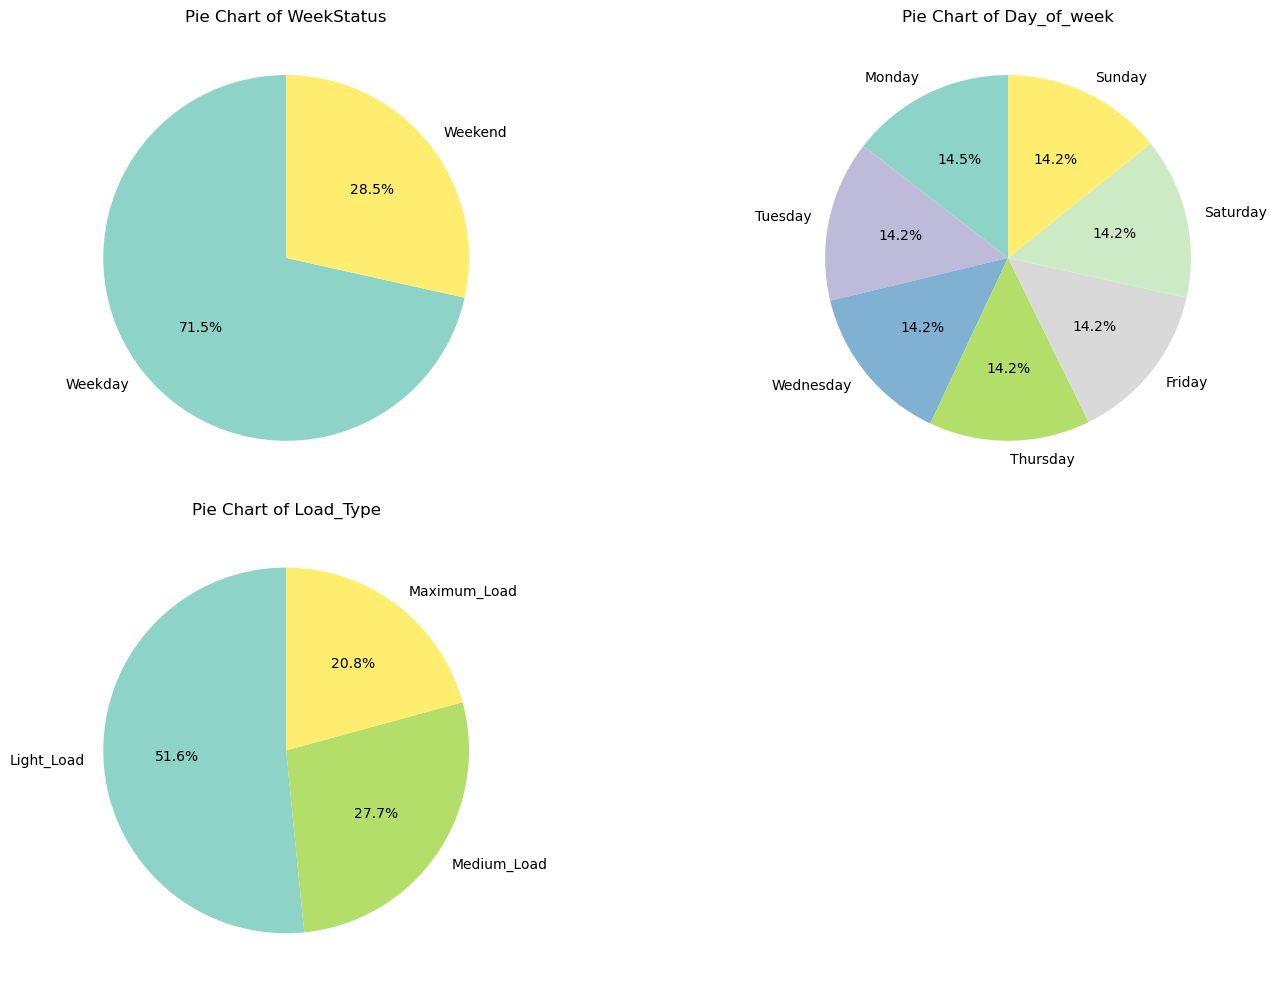

In [ ]:
categoricals = ['WeekStatus', 'Day_of_week', 'Load_Type']
for column in categoricals:
    unique_count = data[column].nunique()
    total_count = len(data[column])  
    percentage_unique = (unique_count / total_count) * 100  # Calculate the percentage
    print(f"Column: {column}, Unique Values Percentage: {percentage_unique:.2f}%")


import matplotlib.pyplot as plt 

def plot_pie_charts(df, columns):
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(columns, 1):
        plt.subplot(2, 2, i)
        df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
        plt.title(f'Pie Chart of {column}')
        plt.ylabel('') 
    plt.tight_layout()
    plt.show()

plot_pie_charts(data,categoricals)

In [ ]:
pd.pivot_table(data, values='Usage_kWh', index='Day_of_week', columns='WeekStatus', aggfunc='mean')

WeekStatus,Weekday,Weekend
Day_of_week,,
Friday,33.195014,NaN
Monday,33.143935,NaN
Saturday,NaN,15.919020
Sunday,NaN,7.545633
Thursday,35.112083,NaN
Tuesday,34.427614,NaN
Wednesday,32.254235,NaN


WeekStatus and Day of the week is about similar data, when it is weekend, the day is Saturday and Sunday. So we can remove one and keep one.
It is easier to encode WeekStatus to be 0 - Saturday and 1 - Sunday, I will keep this column and drop Day_of_week.

In [ ]:
week_map = {
    'Weekday' : 0,
    'Weekend' : 1
}
data['WeekStatus'] = data['WeekStatus'].map(week_map)
data = data.drop(columns=['Day_of_week'])
data.head(3)

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Load_Type
0,3.17,2.95,0.0,0.0,73.21,100.0,900,0,Light_Load
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,Light_Load
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,Light_Load


For the load_type, we can treat this one as ordinal variable when encode it based on the ranking of the loading.

* Maximum_load: 3
* Medimum_load: 2
* Minimum_load: 1

In [ ]:
data['Load_Type'].value_counts()

Load_Type
Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: count, dtype: int64

In [ ]:
load_map = {
    'Maximum_Load' : 3,
    'Medium_Load' : 2,
    'Light_Load' : 1
}
data['Load_Type'] = data['Load_Type'].map(load_map)
data.head(3)

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Load_Type
0,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1


#### Numerical

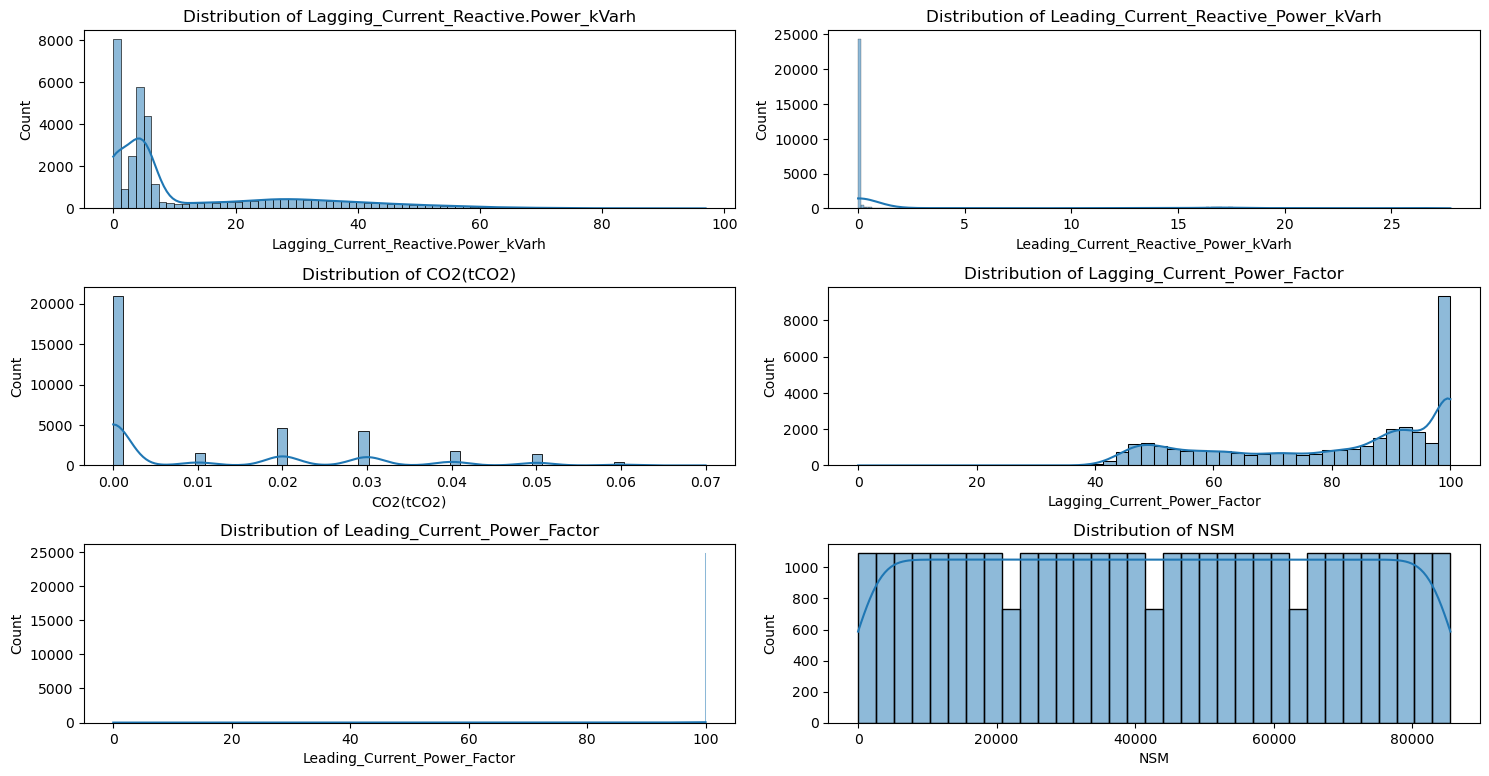

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt 
# Check for numerical columns except the target one and the one we encode
numerical_columns = ['Lagging_Current_Reactive.Power_kVarh', 
    'Leading_Current_Reactive_Power_kVarh', 
    'CO2(tCO2)', 
    'Lagging_Current_Power_Factor', 
    'Leading_Current_Power_Factor', 
    'NSM'
]

# Summary statistics
summary_statistics = data[numerical_columns].describe()

# Distribution plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 2, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

In [ ]:
data.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Load_Type
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000,0.284932,1.691781
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317,0.451388,0.792658
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000,0.000000,1.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000,0.000000,1.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000,1.000000,2.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000,1.000000,3.000000


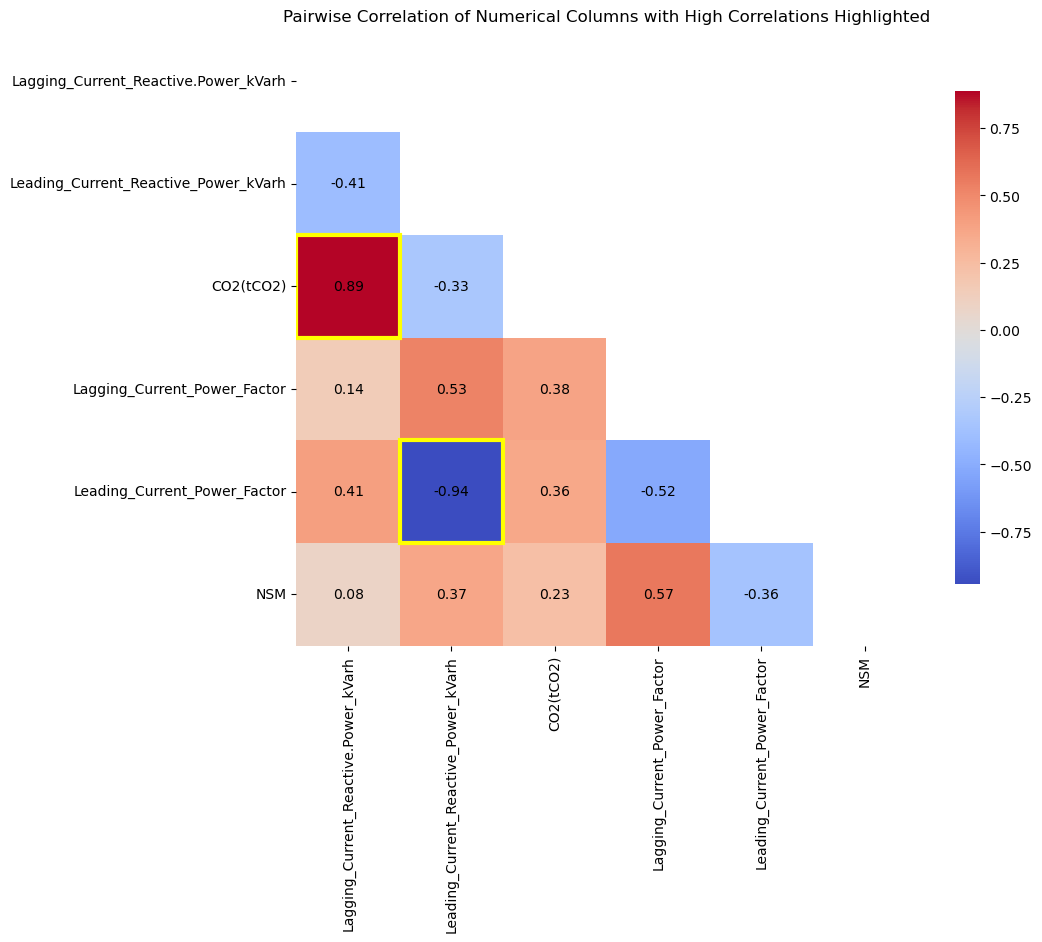

[('CO2(tCO2)', 'Lagging_Current_Reactive.Power_kVarh'), ('Leading_Current_Power_Factor', 'Leading_Current_Reactive_Power_kVarh')]


In [6]:
num_columns = ['Lagging_Current_Reactive.Power_kVarh', 
    'Leading_Current_Reactive_Power_kVarh', 
    'CO2(tCO2)', 
    'Lagging_Current_Power_Factor', 
    'Leading_Current_Power_Factor', 
    'NSM'
]

# Calculate correlation matrix
import numpy as np
import seaborn as sns
correlation_matrix = data[num_columns].corr() # method = 'spearman' if outliners

# Mask the upper triangle and the diagonal
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the correlation matrix with custom annotations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', mask=mask, cbar_kws={'shrink': .8})

# Custom function to annotate the heatmap
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        if not mask[i, j]:
            plt.text(j + 0.5, i + 0.5, f'{correlation_matrix.iloc[i, j]:.2f}',
                     ha='center', va='center', color='black')
            
# Highlight cells with high correlation
threshold = 0.8
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= threshold:
            plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='yellow', lw=3))

plt.title('Pairwise Correlation of Numerical Columns with High Correlations Highlighted')
plt.show()


In [ ]:
# Identify pairs of highly correlated features
high_cor = high_correlation.stack().index.tolist()
high_cor

[('CO2(tCO2)', 'Lagging_Current_Reactive.Power_kVarh'),
 ('Leading_Current_Power_Factor', 'Leading_Current_Reactive_Power_kVarh')]

The pair match with what we saw from the heat map matrix

In [ ]:
# Add new attributes
for (feature1, feature2) in high_corr_pairs:
    new_feature_name = f"{feature1}_x_{feature2}"
    data[new_feature_name] = data[feature1] * data[feature2]

data.head(3)

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Load_Type,CO2(tCO2)_x_Lagging_Current_Reactive.Power_kVarh,Leading_Current_Power_Factor_x_Leading_Current_Reactive_Power_kVarh
0,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0.0,0.0
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0.0,0.0
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0.0,0.0


In [ ]:
data.columns

Index(['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Load_Type',
       'CO2(tCO2)_x_Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Power_Factor_x_Leading_Current_Reactive_Power_kVarh'],
      dtype='object')

# Build Model

In [ ]:
X = data.drop(columns=['Usage_kWh'])
y = data['Usage_kWh']

numerical_cols = ['Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'CO2(tCO2)_x_Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Power_Factor_x_Leading_Current_Reactive_Power_kVarh']

# Perform scaling on numerical columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

#Splitting the data into train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from time import time

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score, mean_squared_error

# define model
model = SGDRegressor()
cv = RepeatedKFold(n_splits=5, n_repeats=2) #RepeatedKFold means repeating KFold with different random state each time

# define parameters
param = {
    'penalty':['l1', 'l2', 'elasticnet'],
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1],
    'tol':[1e-4, 1e-3, 1e-2, 1e-1],
    'fit_intercept':[True, False],
    'eta0':[0.1, 0.01, 0.001]
}

In [ ]:
# define search
search = GridSearchCV(model, param, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X,y)

# summarize result

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -4.662669609328458
Best Hyperparameters: {'alpha': 0.001, 'eta0': 0.01, 'fit_intercept': True, 'penalty': 'l1', 'tol': 0.01}


In [ ]:
# Re-run with only elasticnet
param2 = {
    'penalty':['elasticnet'],
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1],
    'tol':[1e-4, 1e-3, 1e-2, 1e-1],
    'fit_intercept':[True, False],
    'eta0':[0.1, 0.01, 0.001]
}
# define search
search = GridSearchCV(model, param2, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X,y)

# summarize result

print('Best Score of Elasticnet: %s' % result.best_score_)
print('Best Hyperparameters Elasticnetv: %s' % result.best_params_)

Best Score of Elasticnet: -4.6653158390189855
Best Hyperparameters Elasticnetv: {'alpha': 0.0001, 'eta0': 0.001, 'fit_intercept': True, 'penalty': 'elasticnet', 'tol': 0.0001}


We can see the the best parameters are different at fit_intercept and tolerance when we narrow to only elasticnet.

In [ ]:
# Evaluate models with the best hyperparameters found above:
regressors = [
    SGDRegressor(alpha=0.01, eta0= 0.001, fit_intercept= False, penalty = 'l2', tol = 0.01),
    SGDRegressor(alpha=0.01, eta0= 0.001, fit_intercept= True, penalty = 'elasticnet', tol = 0.0001)
]

for model in regressors[:5]:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tMean square error:", mean_squared_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

SGDRegressor(alpha=0.01, eta0=0.001, fit_intercept=False, tol=0.01)
	Training time: 0.061s
	Prediction time: 0.006s
	Explained variance: 0.9392295986612265
	Mean absolute error: 6.529933977811967
	Mean square error: 73.11479511103342
	R2 score: 0.9356792836037185

SGDRegressor(alpha=0.01, eta0=0.001, penalty='elasticnet', tol=0.0001)
	Training time: 0.350s
	Prediction time: 0.001s
	Explained variance: 0.9839122498230561
	Mean absolute error: 2.727374314118676
	Mean square error: 18.306437557691854
	R2 score: 0.9838954184773905



From above result, we can see model using elasticnet with best parameter found has better R2 score, smaller error and can explain better variance.